In [2]:
import pandas as pd
import numpy as np
import pickle
from scipy.sparse import dok_matrix, coo_matrix
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
f1path='dsga-1003-extreme-classification/data/train_features_sparse.pickle'
f2path='dsga-1003-extreme-classification/data/train_labels_sparse.pickle'

train_features = pickle.load(open(f1path, 'rb'))
train_labels = pickle.load(open(f2path, 'rb'))

### Features

In [4]:
train_features_sparse.toarray()

NameError: name 'train_features_sparse' is not defined

In [5]:
train_features.col

array([   0,    1,    2, ..., 4037, 4113, 4844], dtype=int32)

Features are already roughly sorted (by feature number) according to frequency: lower-numbered features occur much more frequently

<BarContainer object of 5000 artists>

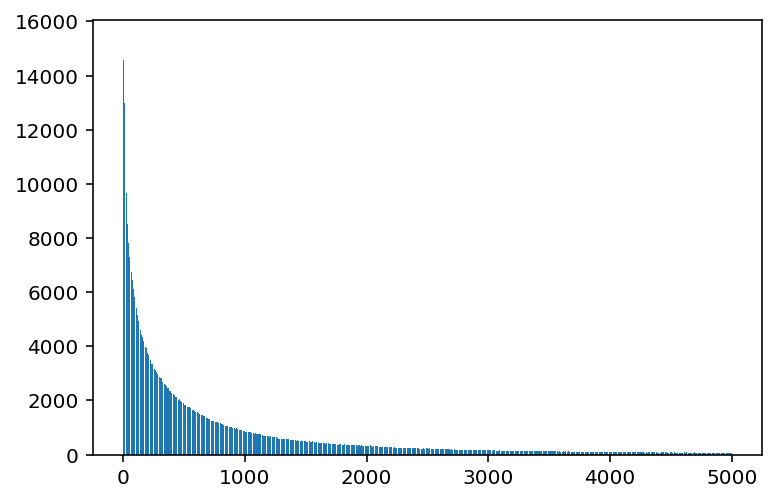

In [6]:
c=Counter(train_features.col)
plt.bar(c.keys(), c.values())

In [7]:
np.array(c.most_common())

array([[    0, 15298],
       [    1, 15010],
       [    2, 14823],
       ...,
       [ 4945,    57],
       [ 4883,    56],
       [ 4902,    56]])

In [9]:
np.array(c.most_common())[:15]

array([[    0, 15298],
       [    1, 15010],
       [    2, 14823],
       [    3, 14569],
       [    4, 14225],
       [    5, 14004],
       [    6, 13572],
       [    7, 13411],
       [    8, 13330],
       [    9, 13311],
       [   10, 13291],
       [   11, 12977],
       [   12, 12788],
       [   13, 12593],
       [   14, 12497]])

In [171]:
train_labels.toarray()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [172]:
train_labels.col

array([ 446,  521, 1149, ...,  204,  681,  686], dtype=int32)

In [173]:
feat_freq = pd.DataFrame(np.array(c.most_common()),columns=['feature','frequency'])

In [181]:
feat_freq[feat_freq['frequency'] <= 100]

,feature,frequency
3828,3943,100
3829,3848,100
3830,3917,100
3831,3853,100
3832,3856,100
...,...,...
4995,4959,58
4996,4876,58
4997,4945,57
4998,4883,56


There are 1172 features (over 23% of all featuers) for which there are 100 or fewer examples in the training data with non-zero feature values.

### Classes

<BarContainer object of 3787 artists>

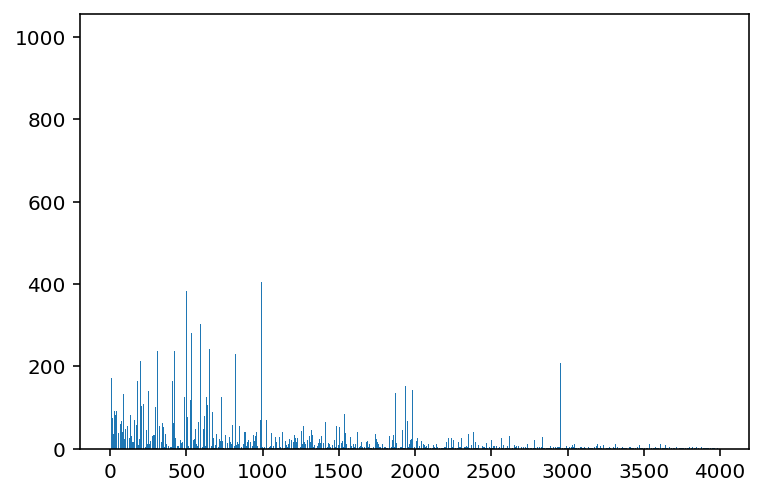

In [121]:
c=Counter(train_labels.col)
plt.bar(c.keys(), c.values())

In [160]:
class_freq = pd.DataFrame(np.array(c.most_common()),columns=['class','frequency'])

In [161]:
class_freq[class_freq.frequency==1]

,class,frequency
3065,3532,1
3066,2826,1
3067,3680,1
3068,3986,1
3069,1751,1
...,...,...
3782,3228,1
3783,2495,1
3784,3399,1
3785,3594,1


In [163]:
class_freq2 = class_freq.groupby('frequency').count()
class_freq2.columns=['# of classes']
class_freq2[:10]

,# of classes
frequency,
1,722
2,458
3,329
4,262
5,162
6,137
7,141
8,85
9,92


There are 722 classes with just 1 example in the training set. 2,070 classes or 52% of all classes have 6 or fewer examples in the training set.